In [1]:
from jupyter_notebooks import fix_jupyter
import networkx as nx
from matplotlib import pyplot as plt
from book_processing.relationship_creator import get_network_df
from wrap.wrapper import Wrapper
import pandas as pd

In [8]:
w = Wrapper()
book_pot = []
for i in range(1, 4):
    w.set_book(i)
    w.book_pipeline()
    book_pot.append(w.get_centrality())

File [1 The Last Wish.csv] already exists
File [2 The Sword of Destiny.csv] already exists
File [3 Blood of Elves.csv] already exists


In [9]:
book_pot

[{'Geralt': 0.7391304347826086,
  'Velerad': 0.05434782608695652,
  'Ostrit': 0.05434782608695652,
  'Adda': 0.05434782608695652,
  'Segelin': 0.043478260869565216,
  'Foltest': 0.05434782608695652,
  'Nenneke': 0.11956521739130435,
  'Yennefer': 0.16304347826086957,
  'Iola': 0.043478260869565216,
  'Roach': 0.043478260869565216,
  'Two': 0.08695652173913043,
  'Rulle': 0.021739130434782608,
  'Nivellen': 0.07608695652173914,
  'Glutton': 0.03260869565217391,
  'Fenne': 0.021739130434782608,
  'Primula': 0.03260869565217391,
  'Ilka': 0.021739130434782608,
  'Venimira': 0.03260869565217391,
  'Vereena': 0.043478260869565216,
  'Falwick': 0.05434782608695652,
  'Hereward': 0.021739130434782608,
  'Ermellia': 0.021739130434782608,
  'Dragomir': 0.021739130434782608,
  'Trigla': 0.021739130434782608,
  'Caldemeyn': 0.08695652173913043,
  'Libushe': 0.06521739130434782,
  'Karelka': 0.021739130434782608,
  'Stregobor': 0.10869565217391304,
  'Zavist': 0.021739130434782608,
  'Eltibald': 0

In [13]:
pot1 = pd.DataFrame.from_records(book_pot)
pot1.index += 1
pot1 = pot1[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]]

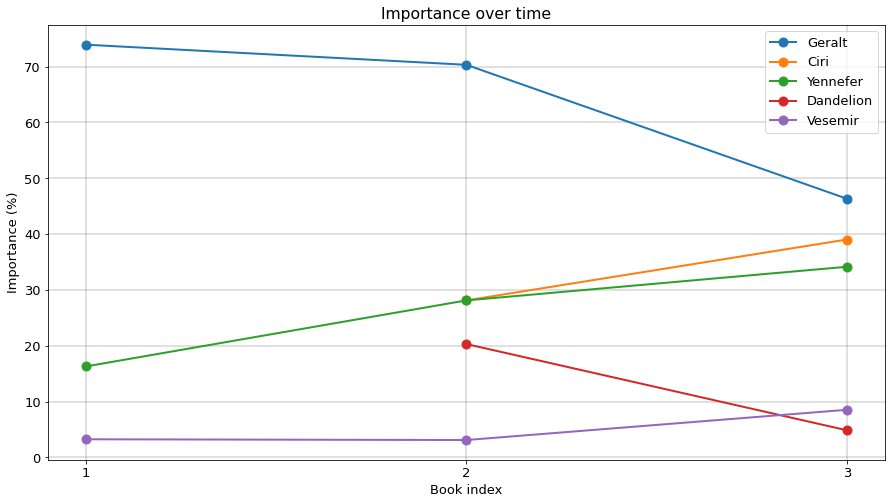

In [38]:
plt.figure(figsize=(15, 8))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x * 100), ',')))
plt.xticks(range(1, len(pot1.index) + 1))
plt.rcParams.update({'font.size': 13})
plt.title("Importance over time")
plt.xlabel("Book index")
plt.ylabel("Importance (%)")
plt.rcParams['lines.linewidth'] = 2
plt.grid(which='major', color='#666666', linewidth=.4)
plt.plot(pot1, linestyle='-', marker='o', markersize=9)
plt.legend(pot1.columns)
#pot1[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot(figsize=(15, 8))

In [32]:
pot1.columns

Index(['Geralt', 'Ciri', 'Yennefer', 'Dandelion', 'Vesemir'], dtype='object')

In [ ]:
network_df = get_network_df()
network_df = network_df.rename(columns={'occurrences': 'value'})

In [ ]:
network_df

In [ ]:
G = nx.from_pandas_edgelist(network_df, source="source", target="target", edge_attr="value", create_using=nx.Graph())

In [ ]:
G

In [ ]:
fig = plt.figure(figsize=(15, 5))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

In [ ]:
from pyvis.network import Network
net = Network(notebook=True, width="1000px", height="700px", bgcolor="#222222", font_color="white")

node_degree = dict(G.degree)
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

In [ ]:
G["Geralt"]